# 8.3 딥 러닝의 학습 방법
이번 챕터에서는 손실 함수와 옵티마이저의 개념을 가지고, 딥 러닝에서 어떻게 학습을 하는지에 대해서 배웁니다.

***
### 1. 순전파(Foward Propagation)
***
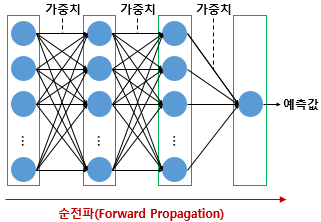

활성화 함수, 은닉층의 수, 각 은닉층의 뉴런 수 등 딥 러닝 모델을 설계하고나면 입력값은 입력층, 은닉층을 지나면서 각 층에서의 가중치와 함께 연산되며 출력층으로 향합니다. 

그리고 출력층에서 모든 연산을 마친 예측값이 나오게 됩니다. 이와 같이 입력층에서 출력층 방향으로 예측값의 연산이 진행되는 과정을 순전파라고 합니다.

***
### 2. 손실 함수(Loss function)
***
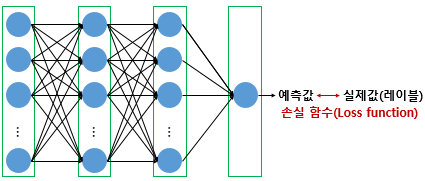

Loss function( Cost function) 실제값과 예측값에 대한 오차에 대한 식을 말함.
이 때 실제값과 예측값에 대한 오차에 대한 식을 목적 함수(Objective function) 또는 비용 함수(Cost function) 또는 손실 함수(Loss function)라고 합니다. 

함수의 값을 최소화하거나, 최대화하거나 하는 목적을 가진 함수를 목적 함수(Objective function)라고 하며,  
값을 최소화하려고 하면 이를 비용 함수(Cost function) 또는 손실 함수(Loss function)라고 합니다. 

비용 함수는 단순히 실제값과 예측값에 대한 오차를 표현하면 되는 것이 아니라, 예측값의 오차를 줄이는 일에 최적화 된 식이어야 합니다.

손실 함수는 실제값과 예측값의 차이를 수치화해주는 함수입니다. 이 두 값의 차이. 즉, 오차가 클 수록 손실 함수의 값은 크고 오차가 작을 수록 손실 함수의 값은 작아집니다. 회귀에서는 평균 제곱 오차, 분류 문제에서는 크로스 엔트로피를 주로 손실 함수로 사용합니다. 손실 함수의 값을 최소화하는 두 개의 매개변수인 가중치 W와 편향 b를 찾아가는 것이 딥 러닝의 학습 과정이므로 손실 함수의 선정은 매우 중요합니다.

##### 1) 손실함수 종류
* MSE(Mean Squared Error)
* 크로스 엔트로피(Cross-Entropy)

##### 2) MSE(Mean Square Error)
$-\frac{1}{N}\sum (y - \hat{y})^2$

##### 3) 크로스 엔트로피(Cross-Entropy)
y: 실제값(0 or 1) / $\hat{y}$: 예측값(확율)  
$-\sum y log\hat{y}$

낮은 확률로 예측해서 맞추거나, 높은 확률로 예측해서 틀리는 경우 loss가 더 큽니다. 이진 분류 (Binary Classification)의 경우 binary_crossentropy를 사용하며 다중 클래스 분류(Multi-Class Classification)일 경우 categorical_crossentropy를 사용합니다.

***
### 3. 옵티마이저(Optimizer)
***
> 선형 회귀를 포함한 수많은 머신 러닝, 딥 러닝의 학습은 결국 비용 함수를 최소화하는 매개 변수인 W와 b을 찾기 위한 작업을 수행합니다. 이때 사용되는 알고리즘을 옵티마이저(Optimizer) 또는 최적화 알고리즘이라고 부릅니다.

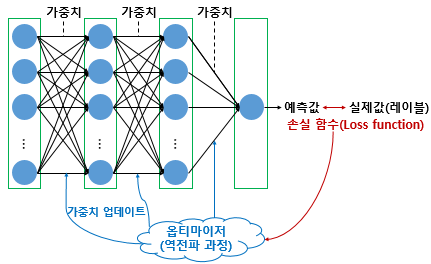

손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라집니다. 여기서 배치(Batch)라는 개념에 대한 이해가 필요합니다. 배치는 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터의 양을 말합니다. 전체 데이터를 가지고 매개 변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정할 수 있습니다.

##### 1) 옵티마이저 종류
* 배치 경사 하강법(Batch Gradient Descent)
* 확률적 경사 하강법(Stochastic Gradient Descent, SGD)
* 미니 배치 경사 하강법(Mini-Batch Gradient Descent)
* 모멘텀(Momentum)
* 아다그라드(Adagrad)
* 알엠에스프롭(RMSprop)
* 아담(Adam)

##### 2) 배치 경사 하강법(Batch Gradient Descent)
배치 경사 하강법(Batch Gradient Descent)은 가장 기본적인 경사 하강법입니다. 
배치 경사 하강법은 옵티마이저 중 하나로 오차(loss)를 구할 때 전체 데이터를 고려합니다. 
- 머신 러닝에서는 1번의 훈련 횟수를 1 에포크라고 하는데, 배치 경사 하강법은 한 번의 에포크에 모든 매개변수 업데이트를 단 한 번 수행합니다. 
- 배치 경사 하강법은 전체 데이터를 고려해서 학습하므로 에포크당 시간이 오래 걸리며, 메모리를 크게 요구한다는 단점이 있으나 글로벌 미니멈을 찾을 수 있다는 장점이 있습니다.

**model.fit(x_train, y_train, batch_size=len(trainx))**

##### 3) 확률적 경사 하강법(Stochastic Gradient Descent, SGD)
기존의 배치 경사 하강법은 전체 데이터에 대해서 계산을 하다보니 시간이 너무 오래걸린다는 단점이 있습니다. 

확률적 경사 하강법은 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법입니다. 더 적은 데이터를 사용하므로 더 빠르게 계산할 수 있습니다.

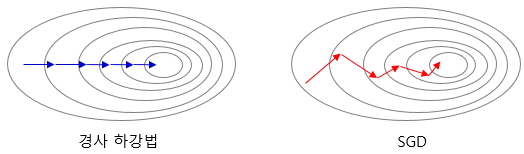

매개변수의 변경폭이 불안정하고, 때로는 배치 경사 하강법보다 정확도가 낮을 수도 있지만 속도만큼은 배치 경사 하강법보다 빠르다는 장점이 있습니다. 케라스에서는 아래와 같이 사용합니다

**model.fit(x_train, y_train, batch_size=1)**

##### 4) 미니 배치 경사 하강법(Mini-Batch Gradient Descent)
전체 데이터도 아니고, 1개의 데이터도 아니고 정해진 양에 대해서만 계산하여 매개 변수의 값을 조정하는 경사 하강법을 미니 배치 경사 하강법이라고 합니다.   
미니 배치 경사 하강법은 전체 데이터를 계산하는 것보다 빠르며, SGD보다 안정적이라는 장점이 있습니다. 실제로 가장 많이 사용되는 경사 하강법입니다.

**model.fit(x_train, y_train, batch_size=32)**

##### 5) 모멘텀(Momentum)
모멘텀(Momentum)은 관성이라는 물리학의 법칙을 응용한 방법입니다. 

- 모멘텀 SGD는 경사 하강법에 관성을 더 해줍니다. 
- 모멘텀은 SGD에서 계산된 접선의 기울기에 한 시점(step) 전의 접선의 기울기값을 일정한 비율만큼 반영합니다. 
- 이렇게 하면 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있습니다.

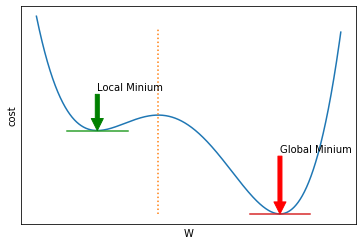

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2, 3.0,0.001)
plt.plot(x,3*x**4-4*x**3-12*x**2+32)

# 0 Axis, Local, Global Minium 
plt.plot([0,0],[0,60],':')
plt.plot([-1.5,-0.5],[27,27])
plt.plot([1.5,2.5],[0,0])

# Annotation
plt.annotate('Local Minium',xy=(-1,27), xytext=(-1,40), arrowprops={'color':'green'})
plt.annotate('Global Minium',xy=(2,0), xytext=(2,20), arrowprops={'color':'red'})

plt.xlabel('W')
plt.ylabel('cost')

# Hide axix value
plt.xticks([])
plt.yticks([])

plt.show()

다시 말해 로컬 미니멈에 도달하였을 때, 기울기가 0이라서 기존의 경사 하강법이라면 이를 글로벌 미니멈으로 잘못 인식하여 계산이 끝났을 상황이라도 모멘텀. 즉, 관성의 힘을 빌리면 값이 조절되면서 로컬 미니멈에서 탈출하는 효과를 얻을 수도 있습니다. 케라스에서는 다음과 같이 사용합니다.

**keras.optimizers.SGD(lr = 0.01, momentum= 0.9)**

##### 6) 아다그라드(Adagrad)
매개변수들은 각자 의미하는 바가 다른데, 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적입니다. 아다그라드는 각 매개변수에 서로 다른 학습률을 적용시킵니다. 이 때, 변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정시킵니다. 케라스에서는 다음과 같이 사용합니다.

**keras.optimizers.Adagrad(lr=0.01, epsilon=le-6)**

##### 7) 알엠에스프롭(RMSprop)
아다그라드는 학습을 계속 진행한 경우에는, 나중에 가서는 학습률이 지나치게 떨어진다는 단점이 있는데 이를 다른 수식으로 대체하여 이러한 단점을 개선하였습니다. 케라스에서는 다음과 같이 사용합니다.

**keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=le-06)**

##### 8) 아담(Adam)
아담은 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법으로, 방향과 학습률 두 가지를 모두 잡기 위한 방법입니다. 케라스에서는 다음과 같이 사용합니다.

**keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2, epsilon=None, decay=0.0, amsgrad=False)**

***
### 4. 역전파(Back Propagation)
***
인공 신경망이 순전파 과정을 진행하여 예측값과 실제값의 오차를 계산하였을 때 어떻게 역전파 과정에서 경사 하강법을 사용하여 가중치를 업데이트하는지 직접 계산을 통해 이해해봅시다.

> lost function은 최종 출력층에만 적용된다.

##### 1) 인공 신경망의 이해(Neural Network Overview)
우선 예제를 위해 사용될 인공 신경망을 소개합니다. 역전파의 이해를 위해서 여기서 사용할 인공 신경망은 
- 입력층, 은닉층, 출력층 이렇게 3개의 층을 가집니다. 
- 또한 해당 인공 신경망은 두 개의 입력과, 두 개의 은닉층 뉴런, 두 개의 출력층 뉴런을 사용합니다. 
- 은닉층과 출력층의 모든 뉴런은 활성화 함수로 시그모이드 함수를 사용합니다.

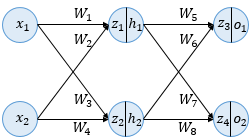

위의 그림은 여기서 사용할 인공 신경망의 모습을 보여줍니다. 

은닉층과 출력층의 모든 뉴런에서 변수 z가 존재하는데 
- 여기서 변수 z는 이전층의 모든 입력이 각각의 가중치와 곱해진 값들이 모두 더해진 가중합을 의미합니다. 
- 이 값은 뉴런에서 아직 시그모이드 함수를 거치지 않은 상태입니다. 즉, 활성화 함수의 입력을 의미합니다. 
- z 우측의 |를 지나서 존재하는 변수 h 또는 o는 z가 시그모이드 함수를 지난 후의 값으로 각 뉴런의 출력값을 의미합니다. 

이번 역전파 예제에서는 인공 신경망에 존재하는 **모든 가중치 W에 대해서 역전파를 통해 업데이트하는 것을 목표**로합니다. 해당 인공 신경망은 편향 b는 고려하지 않습니다.

##### 2) 순전파(Forward Propagation)

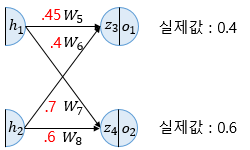

주어진 값이 위의 그림과 같을 때 순전파를 진행해봅시다. 위의 그림에서 소수점 앞의 0은 생략하였습니다. 예를 들어 .25는 0.25를 의미합니다. 파란색 숫자는 입력값을 의미하며, 빨간색 숫자는 각 가중치의 값을 의미합니다. 앞으로 진행하는 계산의 결과값은 소수점 아래 여덟번째 자리까지 반올림하여 표기합니다.

각 입력은 입력층에서 은닉층 방향으로 향하면서 각 입력에 해당하는 가중치와 곱해지고, 결과적으로 가중합으로 계산되어 은닉층 뉴런의 시그모이드 함수의 입력값이 됩니다. $z_1$과 $z_2$는 시그모이드 함수의 입력으로 사용되는 각각의 값에 해당됩니다.

$z_1=W_1x_1+W_2x_2=0.3×0.1+0.25×0.2=0.08$
$z_2=W_3x_1+W_4x_2=0.4×0.1+0.35×0.2=0.11$

$z_1$과 $z_2$는 각각의 은닉층 뉴런에서 시그모이드 함수를 지나게 되는데 시그모이드 함수가 리턴하는 결과값은 은닉층 뉴런의 최종 출력값입니다. 식에서는 각각 $h_1$과 $h_2$에 해당되며, 아래의 결과와 같습니다.

$h1=sigmoid(z1)=0.51998934$  
$h2=sigmoid(z2)=0.52747230$

$h_1$과 $h_2$ 이 두 값은 다시 출력층의 뉴런으로 향하게 되는데 이때 다시 각각의 값에 해당되는 가중치와 곱해지고, 다시 가중합 되어 출력층 뉴런의 시그모이드 함수의 입력값이 됩니다. 식에서는 각각 $z_3$과 $z_4$에 해당됩니다.

$z_3=W_5h_1+W_6h_2=0.45×h_1+0.4×h_2=0.44498412$
$z_4=W_7h_1+W_8h_2=0.7×h_1+0.6×h_2=0.68047592$

$z_3$과 $z_4$이 출력층 뉴런에서 시그모이드 함수를 지난 값은 이 인공 신경망이 최종적으로 계산한 출력값입니다. 실제값을 예측하기 위한 값으로서 예측값이라고도 부릅니다.

$o_1=sigmoid(z_3)=0.60944600$  
$o_2=sigmoid(z_4)=0.66384491$

이제 해야할 일은 **예측값과 실제값의 오차를 계산하기 위한 오차 함수를 선택하는 것입니다. 오차(Error)를 계산하기 위한 손실 함수(Loss function)로는 평균 제곱 오차 MSE를 사용**합니다. 식에서는 실제값을 target이라고 표현하였으며, 순전파를 통해 나온 예측값을 output으로 표현하였습니다. 그리고 각 오차를 모두 더하면 전체 오차 $E_{total}$가 됩니다.

$E_{o_1}=\frac{1}{2}(target_{o_1}−output_{o_1})^2=0.02193381$  
$E_{o_2}=\frac{1}{2}(target_{o_2}−output_{o_2})^2=0.00203809$  
$E_{total}=E_{o_1}+E_{o_2}=0.02397190$

##### 3) 역전파 1단계(BackPropagation Step 1)
순전파가 입력층에서 출력층으로 향한다면 역전파는 반대로 출력층에서 입력층 방향으로 계산하면서 가중치를 업데이트해갑니다. 출력층 바로 이전의 은닉층을 N층이라고 하였을 때, 출력층과 N층 사이의 가중치를 업데이트하는 단계를 역전파 1단계, 그리고 N층과 N층의 이전층 사이의 가중치를 업데이트 하는 단계를 역전파 2단계라고 해봅시다.

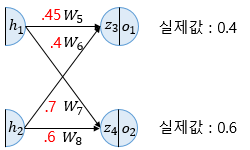

역전파 1단계에서 업데이트 해야 할 가중치는 $W_5,W_6,W_7,W_8$ 총 4개입니다. 원리 자체는 동일하므로 우선 $W_5$에 대해서 먼저 업데이트를 진행해보겠습니다. 경사 하강법을 수행하려면 가중치 $W_5$를 업데이트 하기 위해서 $\frac{∂E_{total}}{∂W_5}$를 계산해야 합니다.

$\frac{∂E_{total}}{∂W_5}$를 계산하기 위해 미분의 연쇄 법칙(Chain rule)에 따라서 이와 같이 풀어 쓸 수 있습니다.

$\frac{∂E_{total}}{∂W_5}=\frac{∂E_{total}}{∂W_{o_1}}×\frac{∂W_{o_1}}{∂W_{z_3}}
×\frac{∂W_{z_3}}{∂W_5}$

위의 식에서 우변의 세 개의 각 항에 대해서 순서대로 계산해봅시다. 우선 첫번째 항에 대해서 계산해보겠습니다. 미분을 진행하기 전에 $E_{total}$의 값을 상기해봅시다. $E_{total}$은 앞서 순전파를 진행하고 계산했던 전체 오차값입니다. 식은 다음과 같습니다.

$E_{total}=\frac{1}{2}(target_{o_1}−output_{o_1})^2+\frac{1}{2}(target_{o_2}−output_{o_2})^2$

이에 $\frac{∂E_{total}}{∂_{o_1}}$ 는 다음과 같습니다.  

$\frac{∂E_{total}}{∂_{o_1}}=2×\frac{1}{2}(target_{o_1}−output_{o_1})^{2-1}×(−1)+0$
$\frac{∂E_{total}}{∂_{o_1}}=−(target_{o_1}−output_{o_1})=−(0.4−0.60944600)=0.20944600$

이제 두번째 항을 주목해봅시다. $o_1$이라는 값은 시그모이드 함수의 출력값입니다. 그런데 시그모이드 함수의 미분은 $f(x)×(1−f(x))$입니다. 앞으로의 계산 과정에서도 계속해서 시그모이드 함수를 미분해야 하는 상황이 생기므로 기억해둡시다. 이에 따라서 두번째 항의 미분 결과는 다음과 같습니다.

$\frac{∂o_1}{∂z_3}=o_1×(1−o_1)=0.60944600(1−0.60944600)=0.23802157$

마지막으로 세번째 항은 $h_1$의 값과 동일합니다.

$\frac{∂z_3}{∂W_5}=h_1=0.51998934$

우변의 모든 항을 계산하였습니다. 이제 이 값을 모두 곱해주면 됩니다.

$\frac{∂E_{total}}{∂W_5}=0.20944600×0.23802157×0.51998934=0.02592286$

이제 앞서 배웠던 경사 하강법을 통해 가중치를 업데이트 할 때가 왔습니다! 하이퍼파라미터에 해당되는 학습률(learning rate) α는 0.5라고 가정합니다.

$W^+_5=W_5−α\frac{∂E_{total}}{∂W_5}=0.45−0.5×0.02592286=0.43703857$

이와 같은 원리로 $W^+_6, W^+_7, W^+_8$을 계산할 수 있습니다.

$\frac{∂E_{total}}{∂W_6}=\frac{∂E_{total}}{∂W_{o_1}}×\frac{∂W_{o_1}}{∂W_{z_3}}
×\frac{∂W_{z_3}}{∂W_6}$→$W^+_6=0.38685205$  

$\frac{∂E_{total}}{∂W_7}=\frac{∂E_{total}}{∂W_{o_2}}×\frac{∂W_{o_2}}{∂W_{z_4}}
×\frac{∂W_{z_4}}{∂W_7}$→$W^+_7=0.69629578$  

$\frac{∂E_{total}}{∂W_8}=\frac{∂E_{total}}{∂W_{o_2}}×\frac{∂W_{o_2}}{∂W_{z_4}}
×\frac{∂W_{z_4}}{∂W_8}$→$W^+_8=0.59624247$


##### 4) 역전파 2단계(BackPropagation Step 2)
***

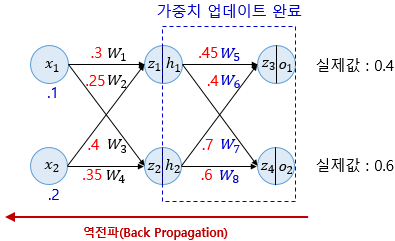

1단계를 완료하였다면 이제 입력층 방향으로 이동하며 다시 계산을 이어갑니다. 위의 그림에서 빨간색 화살표는 순전파의 정반대 방향인 역전파의 방향을 보여줍니다. 현재 인공 신경망은 은닉층이 1개밖에 없으므로 이번 단계가 마지막 단계입니다. 하지만 은닉층이 더 많은 경우라면 입력층 방향으로 한 단계씩 계속해서 계산해가야 합니다.

이번 단계에서 계산할 가중치는 $W_1,W_2,W_3,W_4$입니다. 원리 자체는 동일하므로 우선 $W_1$에 대해서 먼저 업데이트를 진행해보겠습니다. 경사 하강법을 수행하려면 가중치 $W_1$를 업데이트 하기 위해서 $\frac{∂E_{total}}{∂W_1}$를 계산해야 합니다.

$\frac{∂E_{total}}{∂W_1}$를 계산하기 위해 미분의 연쇄 법칙(Chain rule)에 따라서 이와 같이 풀어 쓸 수 있습니다.

$\frac{∂E_{total}}{∂W_1}=\frac{∂E_{total}}{∂W_{h_1}}×\frac{∂W_{h_1}}{∂W_{z_1}}
×\frac{∂W_{z_1}}{∂W_1}$

위의 식에서 우변의 첫번째항인 $\frac{∂E_{total}}{∂W_{h_1}}$는 다음과 같이 다시 식을 풀어서 쓸 수 있습니다.

$\frac{∂E_{total}}{∂h_1}=\frac{∂E_{o_1}}{∂W_{h_1}}×\frac{∂E_{o_2}}{∂W_{h_1}}$

위의 식의 우변의 두 항을 각각 구해봅시다. 우선 첫번째 항 $\frac{∂E_{o_1}}{∂W_{h_1}}$에 대해서 항을 분해 및 계산해보겠습니다.

$\frac{∂E_{o_1}}{∂h_1}
=\frac{∂E_{o_1}}{∂W_{z_3}}×\frac{∂E_{z_3}}{∂W_{h_1}}  
=\frac{∂E_{o_1}}{∂W_{o_1}}×\frac{∂o_1}{∂z_3}×\frac{∂z_3}{∂h_1}  
=−(target_{o_1}−output_{o_1})×o_1×(1−o_1)×W5  
=0.20944600×0.23802157×0.45=0.02243370$

이와 같은 원리로 $\frac{∂E_{o_2}}{∂h_1}$ 또한 구합니다.

$\frac{∂E_{o_2}}{∂h_1}
=\frac{∂E_{o_2}}{∂W_{z_4}}×\frac{∂E_{z_4}}{∂W_{h_1}}  
=\frac{∂E_{o_2}}{∂W_{o_2}}×\frac{∂o_2}{∂z_4}×\frac{∂z_4}{∂h_1}  =0.00997311
$
$\frac{∂E_{total}}{∂h_1}=0.02243370+0.00997311=0.03240681$


이제 $\frac{∂E_{total}}{∂W_1}$를 구하기 위해서 필요한 첫번째 항을 구했습니다. 나머지 두 항에 대해서 구해보도록 하겠습니다.

$\frac{∂h_1}{∂z_1}=h_1×(1−h_1)=0.51998934(1−0.51998934)=0.24960043$
$\frac{∂z_1}{∂W_1}=x_1=0.1$

즉, $\frac{∂E_{total}}{∂W_1}$는 다음과 같습니다.

 $\frac{∂E_{total}}{∂W_1}$=0.03240681×0.24960043×0.1=0.00080888$

이제 앞서 배웠던 경사 하강법을 통해 가중치를 업데이트 할 수 있습니다.

$W^+_1=W_1−α \frac{∂E_{total}}{∂W_1}=0.1−0.5×0.00080888=0.29959556$

이와 같은 원리로 $W^+_2, W^+_3, W^+_4$을 계산할 수 있습니다.

$\frac{∂E_{total}}{∂W_2}=\frac{∂E_{total}}{∂W_{h_1}}×\frac{∂W_{h_1}}{∂W_{z_1}}
×\frac{∂W_{z_1}}{∂W_2}$→$W^+_2=0.24919112$  

$\frac{∂E_{total}}{∂W_3}=\frac{∂E_{total}}{∂W_{h_2}}×\frac{∂W_{h_2}}{∂W_{z_2}}
×\frac{∂W_{z_2}}{∂W_3}$→$W^+_3=0.39964496$  

$\frac{∂E_{total}}{∂W_4}=\frac{∂E_{total}}{∂W_{h_2}}×\frac{∂W_{h_2}}{∂W_{z_2}}
×\frac{∂W_{z_2}}{∂W_4}$→$W^+_4=0.34928991$

##### 5) 결과 확인

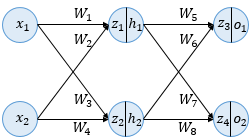

업데이트 된 가중치에 대해서 다시 한 번 순전파를 진행하여 오차가 감소하였는지 확인해보겠습니다.

$z_1=W_1x_1+W_2x_2=0.29959556×0.1+0.24919112×0.2=0.07979778$  
$z_2=W_3x_1+W_4x_2=0.39964496×0.1+0.34928991×0.2=0.10982248$  

$h_1=sigmoid(z_1)=0.51993887$  
$h_2=sigmoid(z_2)=0.52742806$  

$z_3=W_5h_1+W_6h_2=0.43703857×h_1+0.38685205×h_2=0.43126996$  
$z_4=W_7h_1+W_8h_2=0.69629578×h_1+0.59624247×h_2=0.67650625$  

$o_1=sigmoid(z_3)=0.60617688$  
$o_2=sigmoid(z_4)=0.66295848$  

$E_{o_1}=12(target_{o_1}−output_{o_1})^2=0.02125445$  
$E_{o_2}=12(target_{o_2}−output_{o_2})^2=0.00198189$  
$E_{total}=E_{o_1}+E_{o_2}=0.02323634$  

기존의 전체 오차 $E_{total}$가 0.02397190였으므로 1번의 역전파로 오차가 감소한 것을 확인할 수 있습니다. 인공 신경망의 학습은 오차를 최소화하는 가중치를 찾는 목적으로 순전파와 역전파를 반복하는 것을 말합니다.

### 5. 에포크와 배치 크기와 이터레이션(Epochs and Batch size and Iteration)
기계는 실제값과 예측값의 오차로부터 옵티마이저를 통해서 가중치를 업데이트합니다. 머신 러닝에서는 이 과정을 **학습**이라고 합니다.

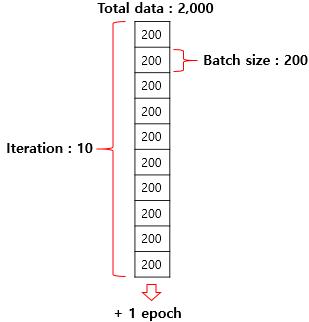

위의 그림은 **에포크와 배치 크기와 이터레이션**의 차이를 보여줍니다. 위의 그림의 예제를 통해 설명해보겠습니다.

##### 1) 에포크(Epoch)
**에포크란 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태**를 말합니다. 

전체 데이터를 하나의 문제지에 비유한다면 문제지의 모든 문제를 끝까지 다 풀고, 정답지로 채점을 하여 문제지에 대한 공부를 한 번 끝낸 상태를 말합니다.

만약 **에포크가 50이라고 하면, 전체 데이터 단위로는 총 50번 학습**합니다. 문제지에 비유하면 문제지를 50번 푼 셈입니다. 이 에포크 횟수가 지나치거나 너무 적으면 앞서 배운 **과적합과 과소적합**이 발생할 수 있습니다.

##### 2) 배치크기(Batch size)
**배치 크기는 몇 개의 데이터 단위로 매개변수를 업데이트 하는지**를 말합니다. 

현실에 비유하면 문제지에서 몇 개씩 문제를 풀고나서 정답지를 확인하느냐의 문제입니다. 사람은 문제를 풀고 정답을 보는 순간 부족했던 점을 깨달으며 지식이 업데이트 된다고 하였습니다. 기계 입장에서는 실제값과 예측값으로부터 오차를 계산하고 옵티마이저가 매개변수를 업데이트합니다. 여기서 중요한 포인트는 업데이트가 시작되는 시점이 정답지/실제값을 확인하는 시점이라는 겁니다.

사람이 2,000 문제가 수록되어있는 문제지의 문제를 200개 단위로 풀고 채점한다고 하면 이때 배치 크기는 200입니다. 기계는 배치 크기가 200이면 200개의 샘플 단위로 가중치를 업데이트 합니다.

여기서 주의할 점은 **배치 크기와 배치의 수는 다른 개념**이라는 점입니다. **전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10**입니다. 이는 에포크에서 배치 크기를 나눠준 값(2,000/200 = 10)이기도 합니다. 이때 **배치의 수를 이터레이션**이라고 합니다.

##### 3) 이터레이션(Iteration)
이터레이션이란 한 번의 에포크를 끝내기 위해서 필요한 배치의 수를 말합니다. 

또는 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수이기도 합니다. 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10개입니다. 이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다는 것을 의미합니다. SGD를 이 개념을 가지고 다시 설명하면, SGD는 배치 크기가 1이므로 모든 이터레이션마다 하나의 데이터를 선택하여 경사 하강법을 수행합니다.